In [56]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/Volumes/MacintoshHDD/Users/mayukh/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [166]:
X,y = make_blobs(n_samples = 200, centers = 2, n_features = 2, cluster_std = 4, random_state = 10)

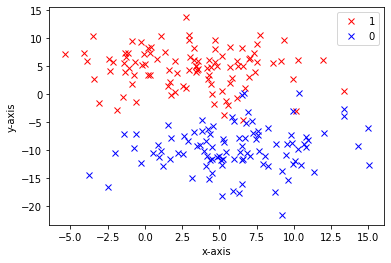

In [167]:
plt.plot(X[y==1][:,0],X[y==1][:,1],'rx')
plt.plot(X[y==0][:,0],X[y==0][:,1],'bx');
plt.legend(['1','0']);
plt.xlabel('x-axis');
plt.ylabel('y-axis');

In [195]:
class LogisticRegression1:
    
    def __init__(self, lr = 0.001, n_iters = 1000):
        
        self.lr = lr
        self.n_iters = n_iters
        self.weight = None
        self.bias = None
    
    def sigmoid(self, z): 
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):        
        #init parameters
        n_samples, n_fea = X.shape
        self.weights = rand(n_fea)
        self.bias = rand()
        
        #gradient descent
        for _ in range(self.n_iters):
            linear = np.dot(X,self.weights)+self.bias
            y_pred = self.sigmoid(linear)
            
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            
            db = (1/n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
              
    def predict(self, X):        
        linear = np.dot(X, self.weights)+self.bias
        y_pred = self.sigmoid(linear)
        return [1 if i > 0.5 else 0 for i in y_pred]
    
    def score(self, X, y_true):
        y_pred = self.predict(X)
        return list(map(lambda x,y: x == y, y_true,y_pred)).count(True)/len(y_true)

In [196]:
model_mine = LogisticRegression1()
model_sklearn = LogisticRegression()

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [207]:
model_mine.fit(X_train,y_train)
model_sklearn.fit(X_train,y_train)

LogisticRegression()

In [208]:
model_sklearn.score(X_test,y_test)

0.9393939393939394

In [209]:
model_mine.score(X_test,y_test)

0.8939393939393939

In [201]:
np.amax(X,axis = 0)

array([15.04371529, 13.7799434 ])

In [202]:
test = np.array([[i,j] for i in np.arange(np.amin(X,axis = 0)[0]-0.5,np.amax(X,axis = 0)[0]+0.5,0.1) for j in np.arange(np.amin(X,axis = 0)[1]-0.5,np.amax(X,axis = 0)[1]+0.5,0.1)])

In [203]:
q = np.array(model_mine.predict(test))

In [204]:
q2 = model_sklearn.predict(test)

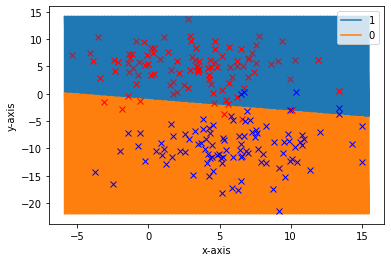

In [205]:
plt.plot(test[q==1][:,0],test[q==1][:,1])
plt.plot(test[q==0][:,0],test[q==0][:,1]);
plt.plot(X[y==1][:,0],X[y==1][:,1],'rx')
plt.plot(X[y==0][:,0],X[y==0][:,1],'bx');
plt.legend(['1','0']);
plt.xlabel('x-axis');
plt.ylabel('y-axis');

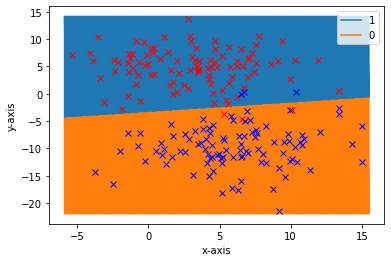

In [206]:
plt.plot(test[q2==1][:,0],test[q2==1][:,1])
plt.plot(test[q2==0][:,0],test[q2==0][:,1]);
plt.plot(X[y==1][:,0],X[y==1][:,1],'rx')
plt.plot(X[y==0][:,0],X[y==0][:,1],'bx');
plt.legend(['1','0']);
plt.xlabel('x-axis');
plt.ylabel('y-axis');

In [194]:
rand()

0.5754410837362626